Historical Performance of a stock named LION

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import array as arr

In [6]:
df = pd.read_csv("Stock.csv")
df.head()

,Close,Volume,EMA5,EMA13,EMA26,MACD,SIGNAL,RSI,ROC,worked?,percentage_returns given
0,1136.95,3594297,1126.883592,1124.903001,1113.181837,12.016158,17.498908,58.490715,2.635974,1,3.135582
1,1147.40,6885679,1133.722395,1128.116858,1115.716515,12.897172,16.578561,61.178123,3.457914,0,2.196270
2,1160.75,8929987,1142.731597,1132.778736,1119.052329,14.505406,16.163930,64.353228,2.336346,0,1.020892
3,1155.65,4729914,1147.037731,1136.046059,1121.763268,15.193278,15.969800,62.258378,4.192400,0,1.466707
4,1138.60,2541804,1144.225154,1136.410908,1123.010433,14.198952,15.615630,55.727237,3.246282,0,2.986123


# Data Analysis

Analysed the data by plotting different histrogram to find the uniqueness of the data

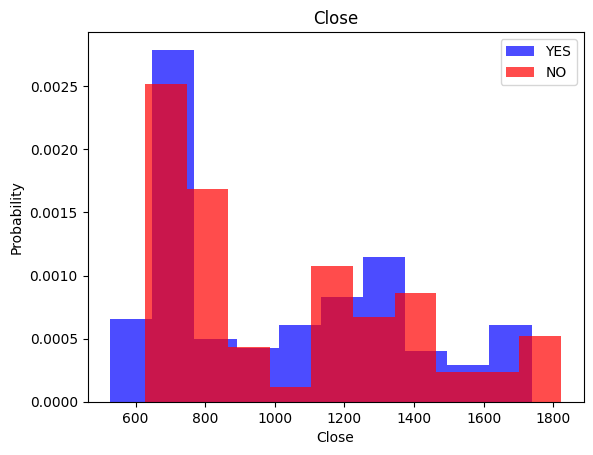

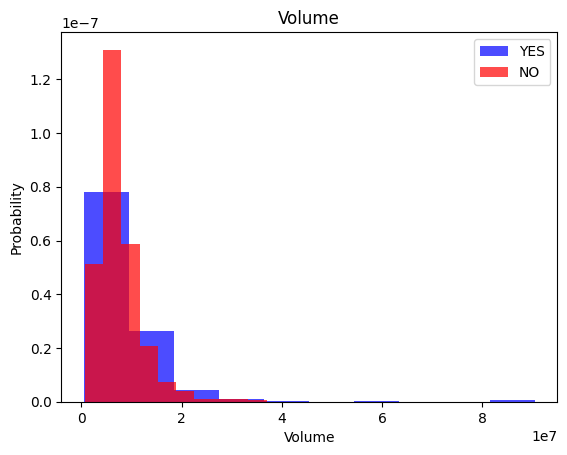

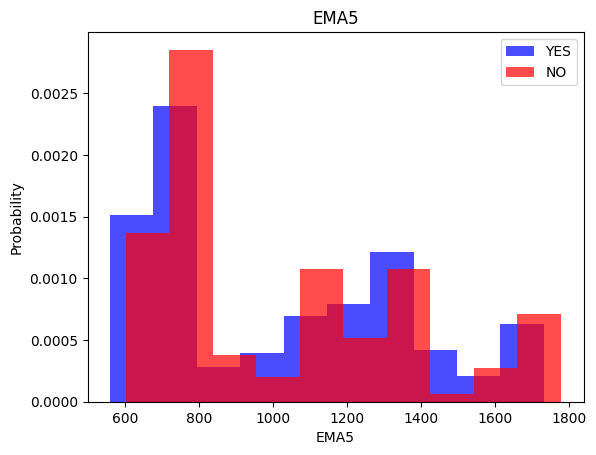

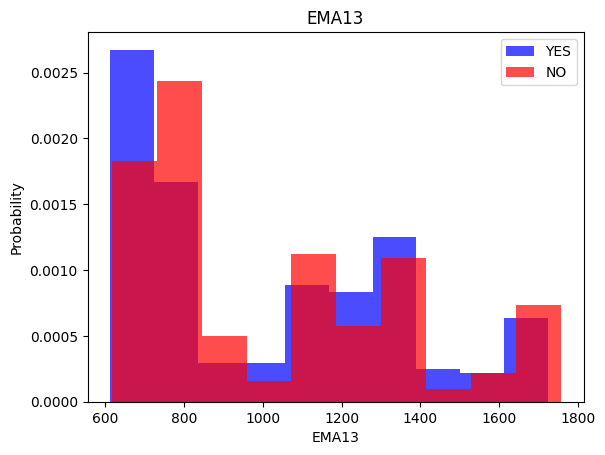

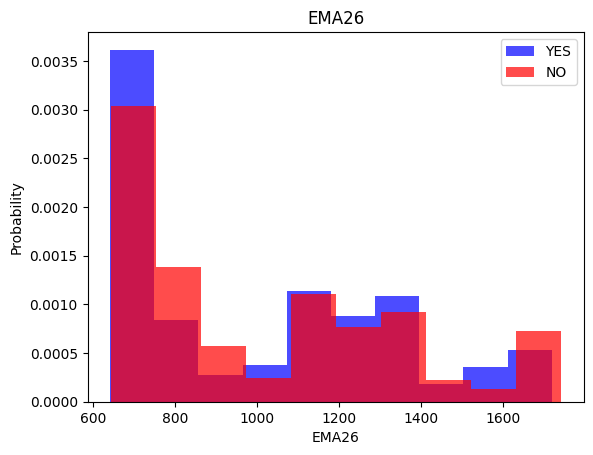

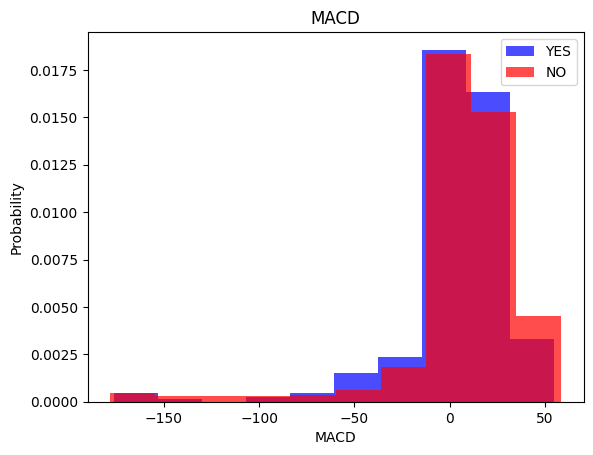

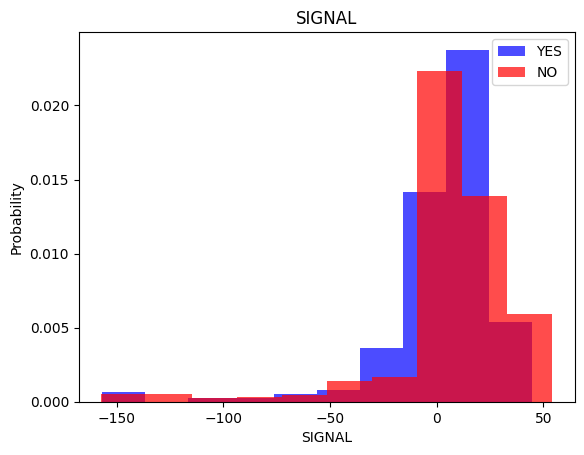

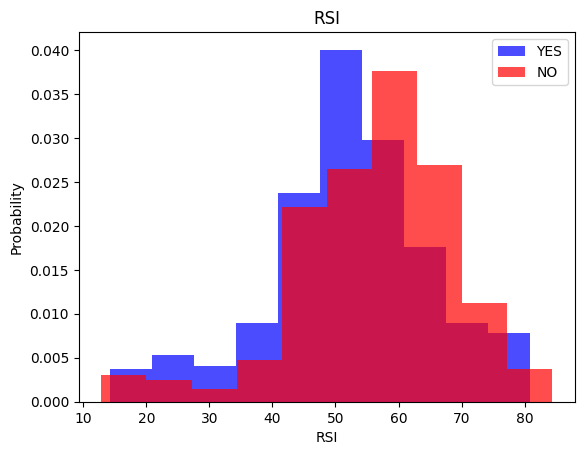

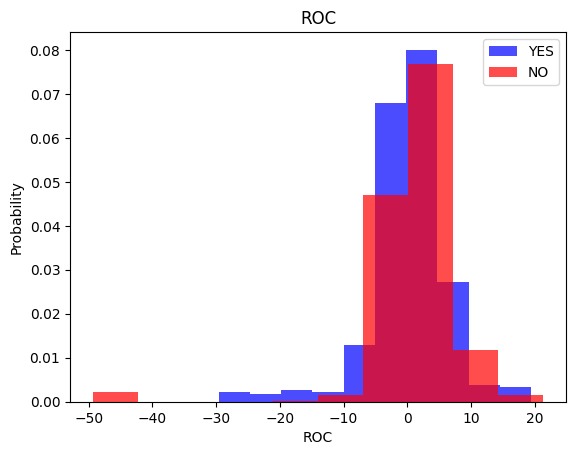

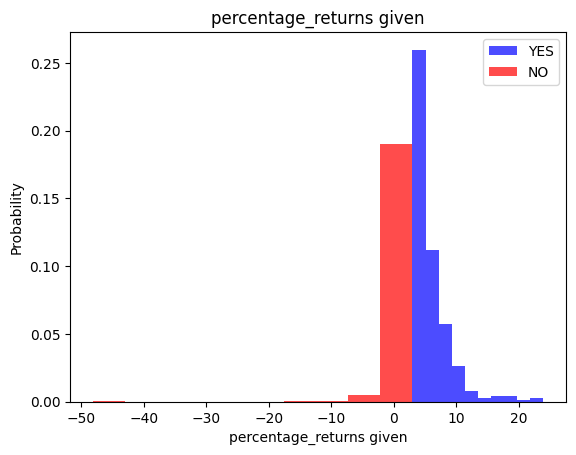

In [7]:
for label in df:
  if(label != "worked?"):
    plt.hist(df[df["worked?"]==1][label], color='blue', label='YES', alpha=0.7, density=True)
    plt.hist(df[df["worked?"]==0][label], color='red', label='NO', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

The dataset is divided for training, validation and testing.

In [8]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
# print(len(train[train["worked?"]==1]))
# print(len(train[train["worked?"]==0]))

# For Worked

Scalling the data set as the number of "Yes" and "No" of the "worked?" column as the difference between their count is arround 100.

## Scale function for worked

In [9]:
def scale_dataset_worked(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-2]].values
  y = dataframe[dataframe.columns[-2]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

Creating the scaled dataset to apply the classification algorithm.

Creating different arrays for storing the f1 score, precision and accuracy for finding the best mode.

In [10]:
train_worked, X_train_worked, y_train_worked = scale_dataset_worked(train, oversample=True)
valid_worked, X_valid_worked, y_valid_worked = scale_dataset_worked(valid, oversample=False)
test_worked, X_test_worked, y_test_worked = scale_dataset_worked(test, oversample=False)
f1array = arr.array('d',[])
precarray = arr.array('d',[])
accuracyarray = arr.array('d',[])

## KNN for Worked

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,f1_score,precision_score,accuracy_score
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_worked, y_train_worked)
y_pred_worked = knn_model.predict(X_test_worked)
print(classification_report(y_test_worked, y_pred_worked))
f1array.append(f1_score(y_test_worked, y_pred_worked))
precarray.append(precision_score(y_test_worked, y_pred_worked))
accuracyarray.append(accuracy_score(y_test_worked, y_pred_worked))

              precision    recall  f1-score   support

           0       0.70      0.58      0.63       116
           1       0.46      0.59      0.51        70

    accuracy                           0.58       186
   macro avg       0.58      0.58      0.57       186
weighted avg       0.61      0.58      0.59       186



## NB for Worked

In [12]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train_worked, y_train_worked)
y_pred_worked = nb_model.predict(X_test_worked)
print(classification_report(y_test_worked, y_pred_worked))
f1array.append(f1_score(y_test_worked, y_pred_worked))
precarray.append(precision_score(y_test_worked, y_pred_worked))
accuracyarray.append(accuracy_score(y_test_worked, y_pred_worked))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       116
           1       0.48      0.31      0.38        70

    accuracy                           0.61       186
   macro avg       0.57      0.55      0.55       186
weighted avg       0.59      0.61      0.59       186



## SVM for Worked

In [13]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(X_train_worked, y_train_worked)
y_pred_worked = svm_model.predict(X_test_worked)
print(classification_report(y_test_worked, y_pred_worked))
f1array.append(f1_score(y_test_worked, y_pred_worked))
precarray.append(precision_score(y_test_worked, y_pred_worked))
accuracyarray.append(accuracy_score(y_test_worked, y_pred_worked))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62       116
           1       0.43      0.54      0.48        70

    accuracy                           0.56       186
   macro avg       0.55      0.56      0.55       186
weighted avg       0.58      0.56      0.57       186



# For Percentage_Return

Similarly scaling the dataset to apply the classification algorithm to percentage returns.

## Scaler Function of Percentage return

In [14]:
def scale_dataset_percent_retun(dataframe):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [15]:
train_percent_retun, X_train_percent_retun, y_train_percent_retun = scale_dataset_percent_retun(train)
valid_percent_retun, X_valid_percent_retun, y_valid_percent_retun = scale_dataset_percent_retun(valid)
test_percent_retun, X_test_percent_retun, y_test_percent_retun = scale_dataset_percent_retun(test)
msearray = arr.array('d',[])
rsarray = arr.array('d',[])

## Linear Regression For Percentage Return


Also, creating an array for mean square error and r-square values to find the best algorithm

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr_model = LinearRegression()
lr_model.fit(X_train_percent_retun, y_train_percent_retun)
y_pred_percent_retun = lr_model.predict(X_test_percent_retun)
print('Coefficients: \n', lr_model.coef_)
print('Mean Squared Error: %.2f' % mean_squared_error(y_test_percent_retun, y_pred_percent_retun))
print('R-squared: %.2f' % r2_score(y_test_percent_retun, y_pred_percent_retun))
msearray.append(mean_squared_error(y_test_percent_retun, y_pred_percent_retun))
rsarray.append(r2_score(y_test_percent_retun, y_pred_percent_retun))


Coefficients: 
 [ 5.46610192e+00  1.47275514e-01 -6.15947622e+01  1.05373497e+03
 -9.70958022e+02 -7.20079434e+01 -1.75172021e+01 -8.47664946e-02
 -5.01753153e-01  2.41947861e+00]
Mean Squared Error: 162.35
R-squared: -16.26


## Random Forest For Percentage Return

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train_percent_retun, y_train_percent_retun)
Y_pred_percent_retun = rf_model.predict(X_test_percent_retun)
print('Mean Squared Error: %.2f' % mean_squared_error(y_test_percent_retun, Y_pred_percent_retun))
print('R-squared: %.2f' % r2_score(y_test_percent_retun, Y_pred_percent_retun))
msearray.append(mean_squared_error(y_test_percent_retun, Y_pred_percent_retun))
rsarray.append(r2_score(y_test_percent_retun, Y_pred_percent_retun))

Mean Squared Error: 4.02
R-squared: 0.57


# Validation

In [18]:
x=[0,1,2]
labels=['KNN','NB','SVM']

## Validation For Worked

F1 Score

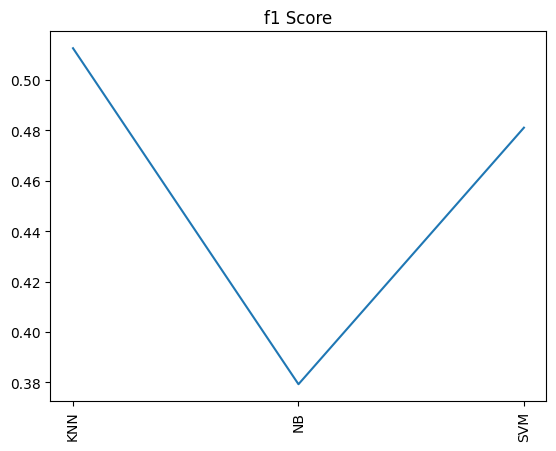

In [19]:
plt.title("f1 Score")
plt.plot(f1array)
plt.xticks(x,labels, rotation=90)
plt.show()

Precision Score

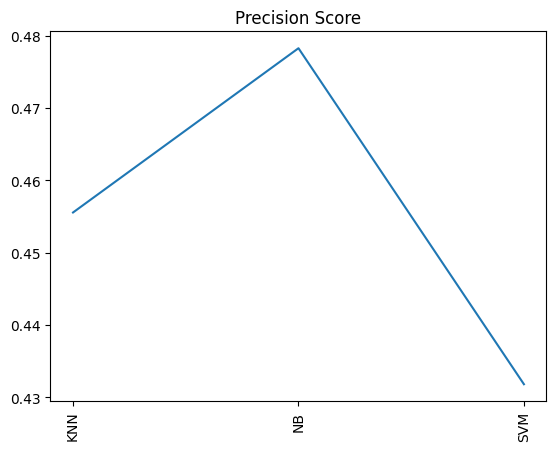

In [20]:
plt.title("Precision Score")
plt.plot(x,precarray)
plt.xticks(x,labels, rotation=90)
plt.show()

Accuracy Score

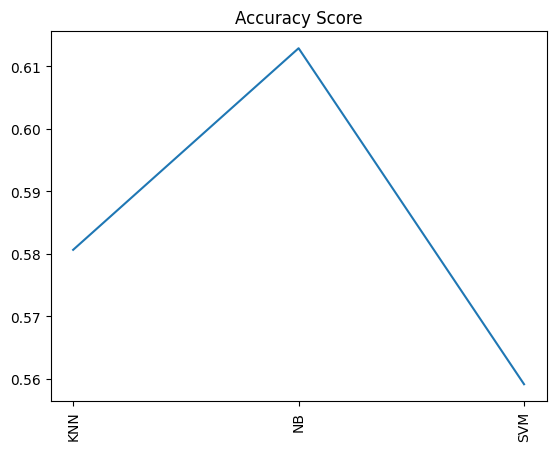

In [21]:
plt.title("Accuracy Score")
plt.plot(x,accuracyarray)
plt.xticks(x,labels, rotation=90)
plt.show()

From all the above graphs we can say the KNN model is better suited for this dataset

We can then enhance the KNN model for this particular dataset.

## Validation For Percentage Return

In [22]:
z=[0,1]
lab=['LR','RF']

Mean Square Error

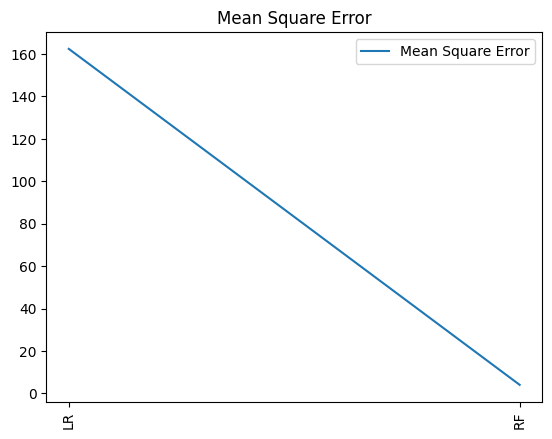

In [23]:
plt.title("Mean Square Error")
plt.plot(msearray,label = 'Mean Square Error')
plt.xticks(z,lab, rotation=90)
plt.legend()
plt.show()

Here, the random forest model is better for the percentage returns.

R-Square

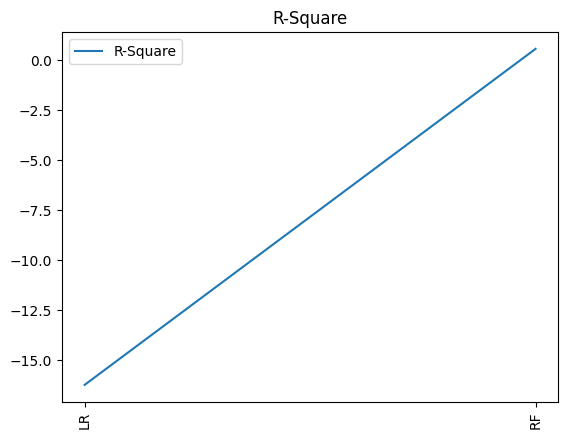

In [24]:
plt.title("R-Square")
plt.plot(rsarray,label = 'R-Square')
plt.xticks(z,lab, rotation=90)
plt.legend()
plt.show()

Similarly, the random forest model explains the variation of the "percentage_returns" around the mean in a better manner.

Regression

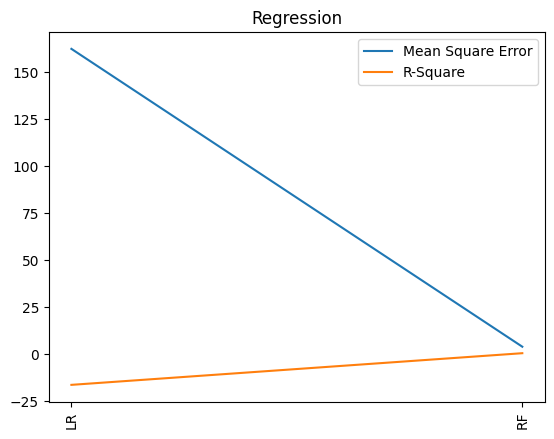

In [25]:
plt.title("Regression")
plt.plot(msearray,label = 'Mean Square Error')
plt.plot(rsarray,label = 'R-Square')
plt.xticks(z,lab, rotation=90)
plt.legend()
plt.show()